In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import seaborn as sns
from datasets import load_dataset


# Loading Dataset

data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()

#Data Clean Up
df.job_posted_date = pd.to_datetime(df.job_posted_date)

#convert job_skills to list
import ast
def clean_li (skill_li):
    if pd.notna(skill_li):
        return ast.literal_eval(skill_li)

In [36]:
df_da = df[(df['job_title'] == 'Data Scientist') & (df['job_country'] == 'India')] .copy()
df_da

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"['r', 'sql', 'python', 'scala', 'java', 'c++',...","{'analyst_tools': ['tableau'], 'libraries': ['..."
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None
389,Data Scientist,Data Scientist,"New Delhi, Delhi, India",via LinkedIn,Contractor,False,India,2023-09-12 13:16:27,False,False,India,None,NaN,NaN,Digital India Corporation,"['sql', 'sas', 'sas', 'excel', 'powerpoint', '...","{'analyst_tools': ['sas', 'excel', 'powerpoint..."
391,Data Scientist,Data Scientist,India,via LinkedIn,Full-time,False,India,2023-11-04 13:31:56,False,False,India,None,NaN,NaN,Magna International,"['azure', 'databricks', 'gdpr', 'power bi', 'u...","{'analyst_tools': ['power bi'], 'cloud': ['azu..."
531,Data Scientist,Data Scientist,"Hyderabad, Telangana, India",via BeBee India,Full-time,False,India,2023-07-19 13:12:10,False,False,India,None,NaN,NaN,NTT DATA,"['python', 'r', 'azure', 'tensorflow', 'sap', ...","{'analyst_tools': ['sap', 'tableau', 'power bi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785076,Data Scientist,Data Scientist,"Bengaluru, Karnataka, India",via BeBee India,Full-time,False,India,2023-01-04 15:41:34,False,False,India,None,NaN,NaN,Epifi,"['python', 'r', 'sql', 'aws', 'redshift', 'pan...","{'cloud': ['aws', 'redshift'], 'libraries': ['..."
785079,Data Scientist,Data Scientist,"Mumbai, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-01-02 06:29:53,False,False,India,None,NaN,NaN,HDFC Bank,None,None
785098,Data Scientist,Data Scientist,"Jaipur, Rajasthan, India",via LinkedIn,Full-time,False,India,2023-01-16 06:12:21,False,False,India,None,NaN,NaN,Marktine Technology Solutions Pvt Ltd,None,None
785145,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via LinkedIn,Contractor,False,India,2023-01-17 06:49:11,False,False,India,None,NaN,NaN,Innovation Hacks AI,"['sql', 'sas', 'sas', 'r', 'python']","{'analyst_tools': ['sas'], 'programming': ['sq..."


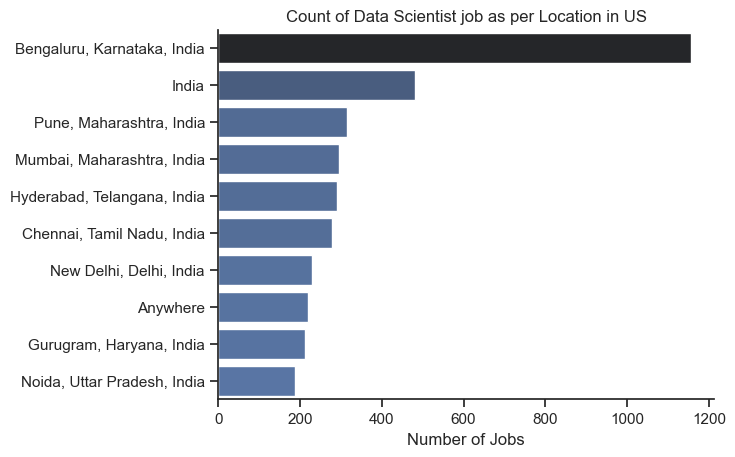

In [33]:
df_plot = df_da['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='job_location',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Count of Data Scientist job as per Location in US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

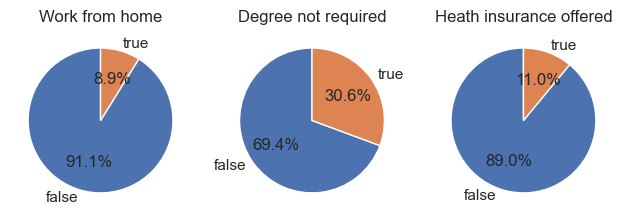

In [34]:
df_da = df[['job_work_from_home','job_no_degree_mention','job_health_insurance']]

fig, ax = plt.subplots(1, 3)

dict_column ={
    'job_work_from_home' :'Work from home',
    'job_no_degree_mention' : 'Degree required',
    'job_health_insurance' : 'Heath insurance offered'
}
for i , (column, title)  in enumerate(dict_column.items()): 
    ax[i].pie(df_da[column].value_counts(),startangle=90, autopct='%1.1f%%', labels=['false','true'])
    ax[i].set_title(title)
     
fig.tight_layout()     
plt.show()


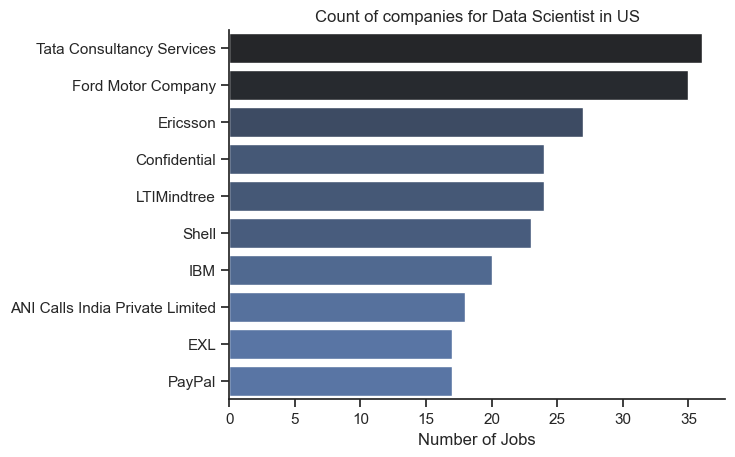

In [37]:
df_plot = df_da['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='company_name',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Count of companies for Data Scientist in US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()